In [1]:
## Import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.ticker as ticker

In [2]:
## Parse the simulation data
%run /home/ibrewer/work/vel_reader.py

Loaded: [------------------------->] 96%



# New code

In [3]:
## Define colors used for plotting

def qualitative_colors(n):
    if n < 1:
        raise ValueError("Minimum number of qualitative colors is 1.")
    elif n > 12:
        raise ValueError("Maximum number of qualitative colors is 12.")
    cols = ["#4477AA", "#332288", "#6699CC", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#661100", "#CC6677", "#AA4466", "#882255", "#AA4499"]
    indices = [
        [0],
        [0, 9],
        [0, 7, 9],
        [0, 5, 7, 9],
        [1, 3, 5, 7, 9],
        [1, 3, 5, 7, 9, 12],
        [1, 3, 4, 5, 7, 9, 12],
        [1, 3, 4, 5, 6, 7, 9, 12],
        [1, 3, 4, 5, 6, 7, 9, 11, 12],
        [1, 3, 4, 5, 6, 7, 8, 9, 11, 12],
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12],
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    ]
    return [cols[ix] for ix in indices[n - 1]]

In [9]:
def veff_polar_plots(az, freq, g_array):
    g_array_1, g_array_2 = g_array[0], g_array[1]
    az_value = np.where(np.linspace(0, 359, 360)==az)[0][0]
    #fig, axs = plt.subplots(2,2, subplot_kw={'projection': 'polar'}, figsize=(12,12))
    f = plt.figure(figsize=(8,8))
    ax = f.add_subplot(111, projection='polar')
    ax.set_thetamin(-90)
    ax.set_thetamax(90)
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi/2.0)
    phi = np.arange(-89, 90, 1)*I3Units.degree # zen actually
    gain_arr = np.sqrt(g_array_1**2 + g_array_2**2)

        #i += 1
    for i in range(len(freq)):
        freq_value = np.where(np.linspace(50, 350, 301)==freq[i])[0][0]
        gain_mirror = np.flip(gain_arr[az_value,:,freq_value])[:-1]
        gain_plot = 20*np.log(np.append(gain_mirror, gain_arr[az_value,:,freq_value]))
        #ax.plot(phi, np.sqrt((g_array_1[az,:,freq_value]**2 + g_array_1[az,:,freq_value]**2)), label='%d MHz' %((np.linspace(50, 350, 301)))[freq_value])
        ax.plot(phi, gain_plot, label='%d MHz' %((np.linspace(50, 350, 301)))[freq_value])
    #fig.suptitle('Gain Plotted in \u03B8 / Degree, \u03C6 = %0.2f' %(az_value), fontsize=25) 
    #ax.set_rticks([0.5, 1, 1.5, 2])
    #ax.tick_params(axis='both', labelsize='x-large')
    ax.set_title('$V_{eff}$ Plotted in \u03B8 / Degree, \u03C6 = %0.2f' %(az_value), fontsize=25, pad=-75)
    ax.legend(fontsize=15, loc='center right')
    plt.show()
    
    return

In [10]:
def gain_plots_old(az, freq, g_array): ## CORRECT CODE!

    az_value = np.where(np.linspace(0, 359, 360)==az)[0][0]    f = plt.figure(figsize=(10,10))
    ax = f.add_subplot(111, projection='polar')
    ax.set_thetamin(-90)
    ax.set_thetamax(90)
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi/2.0)
    phi = np.arange(-89, 90, 1)*I3Units.degree # zen actually
    colors = qualitative_colors(len(freq))

    max_vals = []
    for i in range(len(freq)):
        freq_value = np.where(np.linspace(50, 350, 301)==freq[i])[0][0]
        gain_mirror = np.flip(g_array[az_value,:,freq_value])[:-1]
        gain_plot = 10*np.log10(np.append(gain_mirror, g_array[az_value,:,freq_value]))
        ax.plot(phi, gain_plot, color=colors[i], label='%d MHz' %((np.linspace(50, 350, 301)))[freq_value])
        max_vals.append(np.max(gain_plot))
    #fig.suptitle('Gain Plotted in \u03B8 / Degree, \u03C6 = %0.2f' %(az_value), fontsize=25) 
    ax.tick_params(axis='both', labelsize='large')

    ax.set_title('\u03C6 = %0.2f' %(az_value), fontsize=20, pad=-105)
    ax.set_ylim([-20,np.max(max_vals)])
    #ax.text(2.5, 1, 'Degree \u03B8') #ha='center', va='center'
    ax.set_rticks(np.arange(-20,np.max(max_vals),4))
    ax.tick_params(axis='both', labelsize='x-large')
    ax.legend(fontsize=15, loc='upper right', bbox_to_anchor=(1.05, 0.9))
    plt.ylabel('Zenith Angle \u03B8', fontsize='xx-large', labelpad=25)
    plt.xlabel('Gain (dBi)', fontsize='xx-large', labelpad=-105)
    plt.show()
    
    return

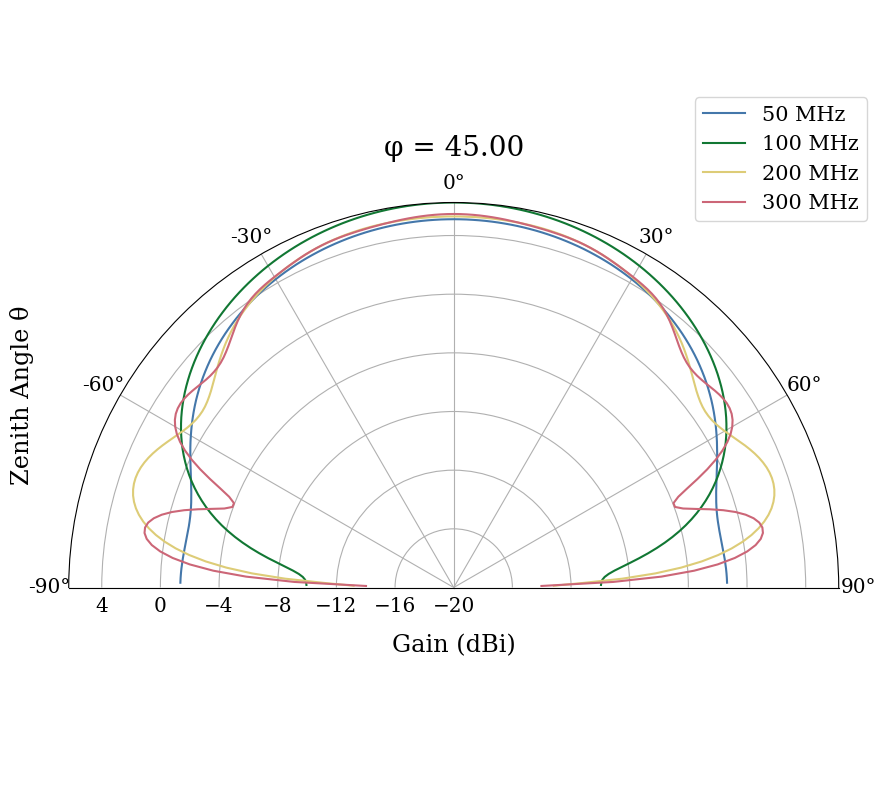

In [11]:
gain_plots_old(45,[50, 100, 200, 300], gain_array)

In [4]:
### Compare measured data and Eloy sims
import os
import sys  
sys.path.insert(0, '/data/user/ibrewer/kansas_data')

import ReadChamberFiles
from ReadChamberFiles import ReadFile, ReadBlock

day2_path = '/data/user/ibrewer/kansas_data/new_data/SKALAv2/Day2/Antenna1/'
day3_path = '/data/user/ibrewer/kansas_data/new_data/SKALAv2/Day3/Antenna1/'

In [5]:
# Total gain calculations
# Looking at the same antenna, same LNA, same azimuth, different polarizations
# Day 3, Antenna 1: Meas37_TxVert_BotLNA_45.1deg_Continuous_3MinRun.txt
# Day 2, Antenna 1: Meas07_TxHorizon_BotLNA_45.2deg_Continuous_3MinRun.txt

In [5]:
# Identify data to plot:
horiz_freqs, horiz_data = ReadFile(day2_path+'Meas07_TxHorizon_BotLNA_45.2deg_Continuous_3MinRun.txt')
vert_freqs, vert_data = ReadFile(day3_path+'Meas37_TxVert_BotLNA_45.1deg_Continuous_3MinRun.txt')
horiz_gain = horiz_data["Horizontal Log Magnitude"]
vert_gain = vert_data["Horizontal Log Magnitude"]

Frequencies:  50.0 500.0 901
Rotation Angles:  0.0 360.0 2.0
Horizontal Real

		360.1,0.000407597

At the last count 901.0
Horizontal Imaginary

		360.1,0.015017

At the last count 901.0
Horizontal Log Magnitude

		360.1,-36.4651

At the last count 901.0
Horizontal Phase

		360.1,88.4452

At the last count 901.0
Horizontal Linearized Phase

		360.1,-47431.6

At the last count 901.0
Frequencies:  50.0 500.0 901
Rotation Angles:  0.0 360.0 2.0
Horizontal Real

		360.7,0.0107744

At the last count 901.0
Horizontal Imaginary

		360.7,-0.0201932

At the last count 901.0
Horizontal Log Magnitude

		360.7,-32.8079

At the last count 901.0
Horizontal Phase

		360.7,-61.9172

At the last count 901.0
Horizontal Linearized Phase

		360.7,-46501.9

At the last count 901.0


In [86]:
def measured_plots(az, meas, freqs, g_array, freqs_array, lna):
    f = plt.figure(figsize=(8,8))
    ax = f.add_subplot(111, projection='polar')
    ax.set_thetamin(0)
    ax.set_thetamax(360)
    ax.set_theta_direction(1)
    ax.set_theta_offset(-np.pi/2.0)
    #Use it like this:
    colors = qualitative_colors(len(freqs))
    #i = 0
    #for subl in [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]:
        #freq_value = np.where(np.linspace(50, 350, 301)==freq[i])[0][0]
        #subl.plot(phi, g_array[az,:,freq_value])
        #subl.set_title('f = %0.2f MHz' %((np.linspace(50, 350, 301)))[freq_value], fontsize=20)
        #subl.set_theta_direction(-1)
        #subl.set_theta_offset(np.pi/2.0)
        #i += 1
    i = 0
    for freq in freqs:
        freq_value = np.where(freqs_array==freq)[0][0]
        g_zen = g_array[1][freq_value]
        g_max  = np.max(g_zen)
        zen = g_array[0]*(np.pi/180)
        #gain_mirror = np.flip(g_zen)
        #gain_plot = np.append(gain_mirror, g_zen)
        ax.plot(zen, g_zen/g_max, color=colors[i], label='%d MHz' %(freq))
        i += 1
        
    #fig.suptitle('Gain Plotted in \u03B8 / Degree, \u03C6 = %0.2f' %(az_value), fontsize=25) 
    ax.tick_params(axis='both', labelsize='large')
    #if g_array == ex_array:
        #ax.set_title('$E_{x}$ Plotted in \u03B8 / Degree, \u03C6 = %0.2f' %(az_value), fontsize=25)
    #if g_array == ey_array:
        #ax.set_title('$E_{y}$ Plotted in \u03B8 / Degree, \u03C6 = %0.2f' %(az_value), fontsize=25)
    ax.set_title('Measurement '+meas+', '+lna+' LNA, \u03C6 = %0.1f' %(az), fontsize=25, pad=25)
    #pad=-25
    #ax.set_rticks(np.arange(0,7,1))
    ax.tick_params(axis='both', labelsize='x-large')
    ax.legend(fontsize=15, loc='center right')
    plt.show()
    
    return

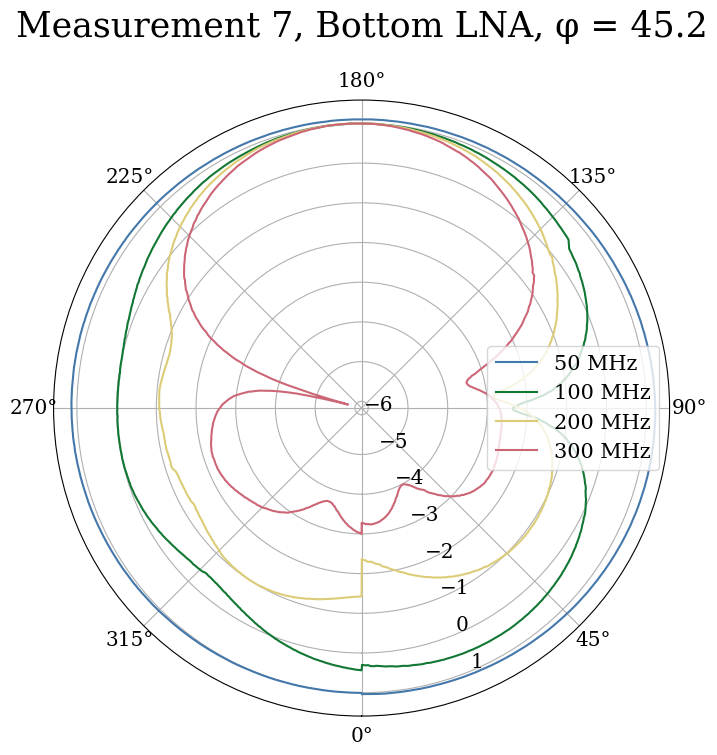

In [87]:
measured_plots(45.2, '7', [50,100,200,300], gain_arr, freqs, 'Bottom')

In [58]:
# Friis transmission equation
# Pr / Pt = Gt * Gr * ( lambda / (4 * pi * d) )**2
# Replace Pr / Pt with beam pattern squared
# Replace Gt with S21^2 of antenna 
# d = 6.5 m
# lambda = c / freq
# Gr = ( Pr / Pt )  * (1 / Gt) * ( 4 * pi * d) * (1 / lambda)

def friis(freq, beam_pattern, s21):
    d = 6.5
    wavelength = (3*(10**8))  / (freq*(10**6))
    extra = (1/(np.abs(s21)**2)) * (((4 * np.pi * d)/wavelength)**2)
    print("extra %f"%extra)
    return beam_pattern - s21 - 20*np.log10((4 * np.pi * d)/wavelength)

In [77]:
# File to find S21 parameter:
# path: /data/user/ibrewer/kansas_data/new_data/SKALAv2/Day1/Antenna1
# file: TxHroiz_45azi_180zen.s2p

import skrf as rf

def s_param(file_name):
    
    file = rf.Network(file_name) # Change directory
    # File must be a .s2p file
    size = file.s.shape[0]
    freqs = file.f # Extract the frequencies
    
    s11 = np.zeros(size)
    s12 = np.zeros(size)
    s21 = np.zeros(size)
    s22 = np.zeros(size)

    # Extract S parameters
    for i in range(size):
        matrix = abs(file.s[i])
        s11[i] = 20*np.log10(matrix[0][0])
        s12[i] = 20*np.log10(matrix[0][1])
        s21[i] = matrix[1][0]
        s22[i] = 20*np.log10(matrix[1][1])
    
    return s11, s12, s21, s22, freqs

In [78]:
s11, s12, s21, s22, freq_LNA = s_param('/data/user/ibrewer/kansas_data/new_data/SKALAv2/Day1/Antenna1/TxHroiz_45azi_180zen.s2p')

In [49]:
def power_watts(dBm):
    return 10**(dBm/10)

In [70]:
def total_gain_comparison(az, meas, freqs, g_horiz, g_vert, freqs_horiz, freqs_vert, g_array_sim, s21, freq_LNA, lna):
    # Compare Eloy's sims to total gain
    # az = azimuth angle, float
    # meas = measurement number, string
    # freqs = desired frequencies to plot, list, ex. [50,100,200]
    # g_horiz = gain w horizontal polarization, array (found with ReadFile)
    # g_vert = gain w vertical polarization, array (found with ReadFile)
    # freqs_horiz = possible frequencies in the horizontal direction, array (found with ReadFile)
    # freqs_vert = possible frequencies in the vertical direction, array (found with ReadFile)
    # lna = LNA type, string (specify top or bottom LNA)
    
    # First address some formatting:
    f = plt.figure(figsize=(8,8))
    ax = f.add_subplot(111, projection='polar')
    ax.set_thetamin(0)
    ax.set_thetamax(360)
    ax.set_theta_direction(1)
    ax.set_theta_offset(np.pi/2.0)
    zen_sim = np.arange(-89, 90, 1)*I3Units.degree
    az_value_sim = np.where(np.linspace(0, 359, 360)==az)[0][0]
    colors = qualitative_colors(len(freqs))
    
    # Then plot measured data: 
    i = 0
    for freq in freqs:
        # Horizontal
        freq_value_horiz = np.where(freqs_horiz==freq)[0][0]
        g_zen_horiz = g_horiz[1][freq_value_horiz]
        #g_max  = np.max(g_zen)
        zen_horiz = g_horiz[0]*(np.pi/180) - 180*I3Units.degree
        # Vertical 
        freq_value_vert = np.where(freqs_vert==freq)[0][0]
        g_zen_vert = g_vert[1][freq_value_vert]
        zen_vert = g_vert[0]*(np.pi/180) - 180*I3Units.degree
        # Combine horizontal and vertical, compute Friis
        beam_pattern = 20*np.log10(power_watts(g_zen_horiz[:629]) + power_watts(g_zen_vert[:629]))
        s21_actual = s21[np.where(freq_LNA==(freq*10**6))[0][0]]
        total_gain = friis(freq, beam_pattern, s21_actual)
        #total_gain = gain_added / np.max(gain_added)
        #gain_mirror = np.flip(g_zen)
        #gain_plot = np.append(gain_mirror, g_zen)
        #ax.plot(zen_horiz, 10*np.log10(g_zen_horiz), color='blue', label='%d MHz, Horizontal' %(freq))
        #ax.plot(zen_vert, 10*np.log10(g_zen_vert), color='red', label='%d MHz, Vertical' %(freq))
        index_180 = np.where(zen_horiz==0)[0][0]
        ax.plot(zen_horiz[:629], total_gain, color='purple', label='Measurements '+meas)
        i += 1
        
    # Plot Eloy sims:   
    for i in range(len(freqs)):
        freq_value = np.where(np.linspace(50, 350, 301)==freqs[i])[0][0]
        index_180_sim = np.where(zen_sim==0)[0][0]
        gain_mirror_sim = np.flip(g_array_sim[az_value_sim,:,freq_value])[:-1]
        gain_added_sim = np.append(gain_mirror_sim, g_array_sim[az_value_sim,:,freq_value])
        gain_plot_sim = 10*np.log10(gain_added_sim)
        ax.plot(zen_sim, gain_plot_sim, '--', color='purple', label='Manufacturer Sim' %((np.linspace(50, 350, 301)))[freq_value])
        #max_vals.append(np.max(gain_plot_sim))
        
    ax.tick_params(axis='both', labelsize='large')
    ax.set_title('200 MHz, '+lna+' LNA, \u03C6 = %0.1f' %(az), fontsize=20, pad=25)
    ax.tick_params(axis='both', labelsize='x-large')
    ax.legend(fontsize=15, loc='lower center')
    plt.show()
    
    return

extra 68.067554


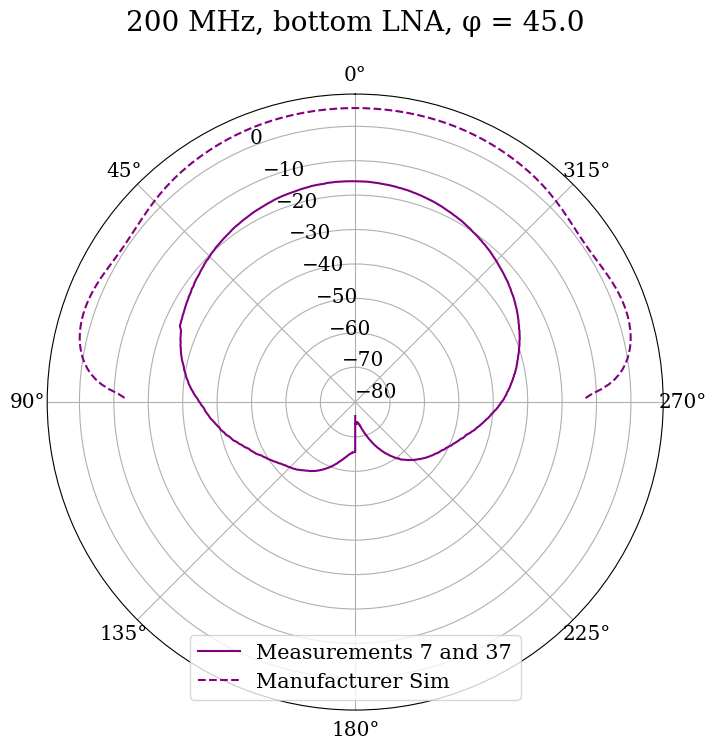

In [71]:
total_gain_comparison(45, '7 and 37', [200], horiz_gain, vert_gain, horiz_freqs, vert_freqs, gain_array, s21, freq_LNA, 'bottom')

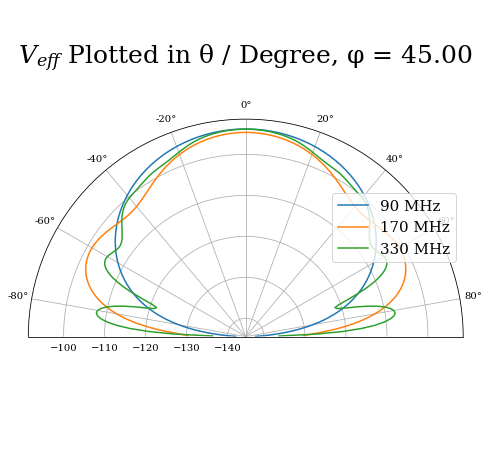

In [11]:
veff_polar_plots(45,[90, 170, 330], [ex_array, ey_array])

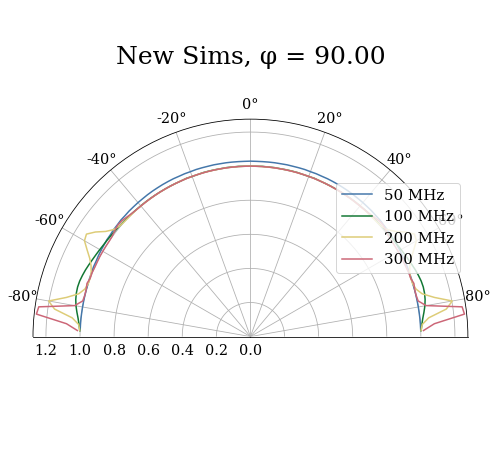

In [58]:
gain_plots(90,[50, 100, 200, 300], gain_array)

# Old code

In [107]:
### Plotting both on the same graph

def sim_v_data(az_sim, freq_sim, freqs_meas, g_array_sim, g_array_meas, freqs_array):
    az_value_sim = np.where(np.linspace(0, 359, 360)==az_sim)[0][0]
    #fig, axs = plt.subplots(2,2, subplot_kw={'projection': 'polar'}, figsize=(12,12))
    f = plt.figure(figsize=(8,8))
    ax = f.add_subplot(111, projection='polar')
    ax.set_thetamin(90)
    ax.set_thetamax(-90)
    ax.set_theta_direction(1)
    ax.set_theta_offset(np.pi/2)
    colors = qualitative_colors(len(freq_sim))
    
    i = 0
    for freq in freqs_meas:
        freq_value = np.where(freqs_array==freq)[0][0]
        g_zen = 10*np.log10(g_array_meas[1][freq_value])
        g_max  = np.max(g_zen)
        zen = g_array_meas[0]*(np.pi/180) - 180*I3Units.degree
        #gain_mirror = np.flip(g_zen)
        #gain_plot = np.append(gain_mirror, g_zen)
        ax.plot(zen, g_zen/g_max, '-', color=colors[i], label='%d MHz Measured' %(freq))
        i += 1
        
    #ax.set_thetamin(-90)
    #ax.set_thetamax(90)
    #ax.set_theta_direction(-1)
    #ax.set_theta_offset(np.pi/2.0)
    zen_sim = np.arange(-89, 90, 1)*I3Units.degree #+ 180*I3Units.degree# zen actually

    max_vals = []
    for i in range(len(freq_sim)):
        freq_value = np.where(np.linspace(50, 350, 301)==freq_sim[i])[0][0]
        gain_mirror_sim = np.flip(g_array_sim[az_value_sim,:,freq_value])[:-1]
        gain_plot_sim = 10*np.log10(np.append(gain_mirror_sim, g_array_sim[az_value_sim,:,freq_value]))
        ax.plot(zen_sim, gain_plot_sim, '--', color=colors[i], label='%d MHz Sim' %((np.linspace(50, 350, 301)))[freq_value])
        max_vals.append(np.max(gain_plot_sim))

    ax.tick_params(axis='both', labelsize='large')
    #ax.set_title('\u03C6 = %0.2f' %(az_value_sim), fontsize=20, pad=-105)
    #ax.set_ylim([-20,np.max(max_vals)])
    #ax.text(2.5, 1, 'Degree \u03B8') #ha='center', va='center'
    #ax.set_rticks(np.arange(-20,np.max(max_vals),4))
    #ax.tick_params(axis='both', labelsize='x-large')
    #ax.legend(fontsize=15, loc='upper right', bbox_to_anchor=(1.05, 0.9))
    plt.ylabel('Zenith Angle \u03B8', fontsize='xx-large', labelpad=25)
    #plt.xlabel('Gain (dBi)', fontsize='xx-large', labelpad=-105)
    #plt.show()
    ax.tick_params(axis='both', labelsize='large')
    #ax.set_title('New Sims, \u03C6 = %0.2f' %(az_value), fontsize=25, pad=-75)
    #ax.set_rticks(np.arange(0,7,1))
    ax.tick_params(axis='both', labelsize='x-large')
    ax.legend(fontsize=15, loc='center right')
    plt.show()
    
    return

In [95]:
count = 1
for line in eloy_file:
    print(line)
    count += 1
    if count == 20:
        break

Min, Max, Step  (for frequency, theta, phi)

50 650 1.0

0 88 2

0 358 2.0

Theta, Phi, ThetaGain, ThetaPhase, PhiGain, PhiPhase

0.0 0.0 0.6751890529348217 133.686 0.7572920417716961 294.121

2.0 0.0 0.6755491537630536 133.748 0.756931940943464 294.187

4.0 0.0 0.6753153153153154 133.922 0.7571171171171172 294.351

6.0 0.0 0.6750902527075813 134.206 0.7574007220216606 294.615

8.0 0.0 0.6746290264205574 134.6 0.7575099529496924 294.978

10.0 0.0 0.6741736287686161 135.103 0.758445332364693 295.443

12.0 0.0 0.6733576642335766 135.713 0.7594890510948904 296.008

14.0 0.0 0.6719266055045872 136.43 0.7603669724770642 296.677

16.0 0.0 0.670853343184337 137.25 0.7617288511267085 297.448

18.0 0.0 0.6691477484183105 138.173 0.7629326386304428 298.325

20.0 0.0 0.6674174174174173 139.196 0.7646396396396395 299.307

22.0 0.0 0.66565579984837 140.317 0.7664897649734647 300.395

24.0 0.0 0.6634725948639326 141.532 0.7681103871215025 301.591

26.0 0.0 0.660977501939488 142.838 0.769976726144298

In [106]:
eloy_file.close()

In [108]:
eloy_gain_array = np.zeros()

count = 0
for line in eloy_file:
    if count >= 5:
        print(line)
    if count == 20:
        break
    count += 1

Theta, Phi, ThetaGain, ThetaPhase, PhiGain, PhiPhase

0.0 0.0 0.6751890529348217 133.686 0.7572920417716961 294.121

2.0 0.0 0.6755491537630536 133.748 0.756931940943464 294.187

4.0 0.0 0.6753153153153154 133.922 0.7571171171171172 294.351

6.0 0.0 0.6750902527075813 134.206 0.7574007220216606 294.615

8.0 0.0 0.6746290264205574 134.6 0.7575099529496924 294.978

10.0 0.0 0.6741736287686161 135.103 0.758445332364693 295.443

12.0 0.0 0.6733576642335766 135.713 0.7594890510948904 296.008

14.0 0.0 0.6719266055045872 136.43 0.7603669724770642 296.677

16.0 0.0 0.670853343184337 137.25 0.7617288511267085 297.448

18.0 0.0 0.6691477484183105 138.173 0.7629326386304428 298.325

20.0 0.0 0.6674174174174173 139.196 0.7646396396396395 299.307

22.0 0.0 0.66565579984837 140.317 0.7664897649734647 300.395

24.0 0.0 0.6634725948639326 141.532 0.7681103871215025 301.591

26.0 0.0 0.660977501939488 142.838 0.769976726144298 302.894

28.0 0.0 0.659064097522611 144.233 0.7719229256783326 304.306

30.

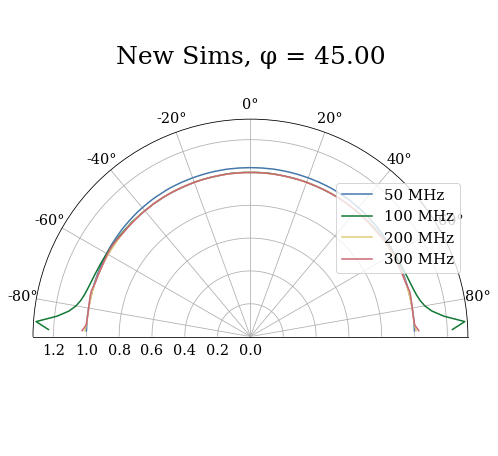

In [63]:
gain_plots(45,[50, 100, 200, 300], gain_array)

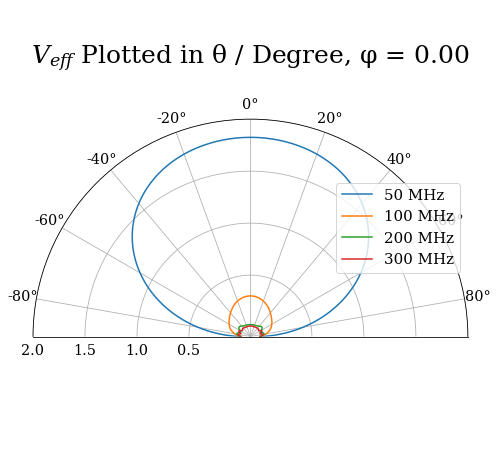

In [5]:
veff_polar_plots(0,[50, 100, 200, 300], [ex_array, ey_array])

In [71]:
def e_grad_plots_zen(plot_no, freq, grad_array):
    fig, axs = plt.subplots(plot_no,2, subplot_kw={'projection': '3d'}, squeeze=False, figsize=(12,12))
    azi, zen = np.linspace(0, 359, 360), np.linspace(0, 90, 91)
    Z, A = np.meshgrid(zen, azi)
    grad_array_1, grad_array_2 = grad_array[0], grad_array[1]
    i = 0
    for i in range(0,plot_no):
        for m in range (0,2):
            subpl = axs[i,m]
            freq_value = np.where(np.linspace(50, 350, 301)==freq[i])[0][0]
            if m == 0:
                subpl.plot_surface(Z, A, grad_array_1[1][:,:,freq_value], cmap=cm.coolwarm, linewidth=0, antialiased=False)
                subpl.set_title('Gradient, f = %0.1f MHz' %(freq[i]), fontsize=20)
                subpl.set_zticks(np.linspace(np.min(grad_array_1[1][:,:,freq_value]), np.max(grad_array_1[1][:,:,freq_value]), 5))
            if m == 1:
                mat_sq = ((grad_array_1[1][:,:,freq_value]**2) + (grad_array_2[1][:,:,freq_value]**2))/(ex_array[:,:,freq_value]**2 + ey_array[:,:,freq_value]**2)
                mat_sq[mat_sq == 0] = 10**-10
                #mat_sq_masked = np.abs(np.ma.masked_where(mat_sq==0, mat_sq))
                g_squared = np.log10(np.abs(mat_sq))
                g_squared[g_squared < -8] = -8
                #g_squared_masked = np.ma.masked_where(g_squared<-8, g_squared)
                subpl.plot_surface(Z, A, g_squared, cmap=cm.coolwarm, linewidth=0, antialiased=False)
                subpl.set_title('Quadrature, f = %0.1f MHz' %(freq[i]), fontsize=20)
                subpl.set_zticks(np.linspace(np.min(g_squared), np.max(g_squared), 5))
                subpl.set_zlim(np.min(g_squared), np.max(g_squared))
                #subpl.set_zscale('log')
                #subpl.zaxis._set_scale('log')
            #subpl.zaxis.set_major_locator(LinearLocator(10))
            subpl.set_xlabel('\u03B8', fontsize=20)
            subpl.set_ylabel('\u03C6', fontsize=20)
            subpl.set_zlabel('log(Magnitude)')
            subpl.set_yticks([0, 90.0, 180, 270, 360])
            subpl.set_xlim(0, 90)
            #subl.set_ylim(-1.01, 1.01)
    plt.tight_layout()      
    fig.suptitle('Ex, wrt \u03B8', fontsize=25)

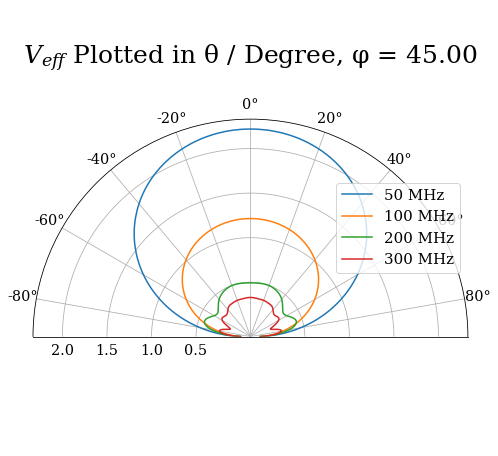

In [6]:
veff_polar_plots(45,[50, 100, 200, 300], [ex_array, ey_array])

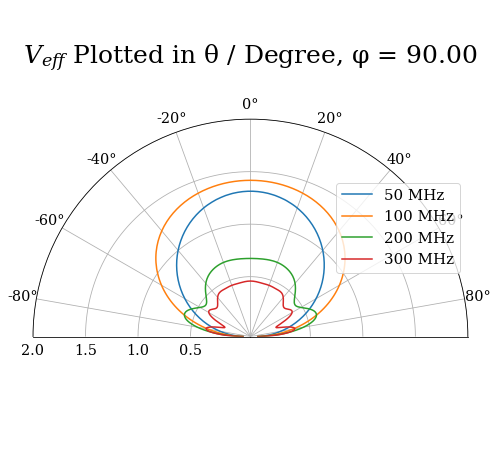

In [64]:
veff_polar_plots(90,[50, 100, 200, 300], [ex_array, ey_array])

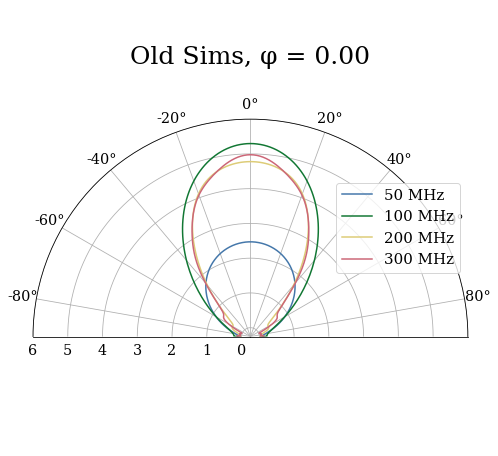

In [8]:
gain_plots(0,[50, 100, 200, 300], gain_array)

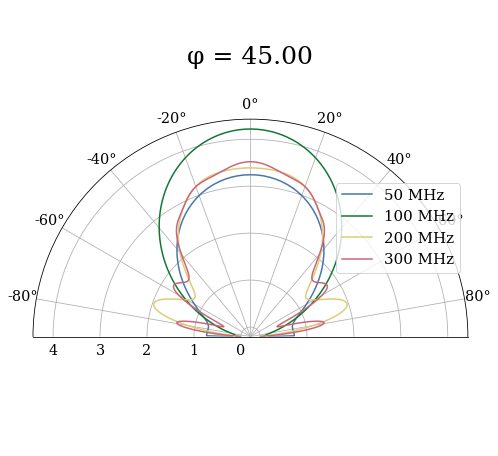

In [24]:
gain_plots(45,[50, 100, 200, 300], gain_array)

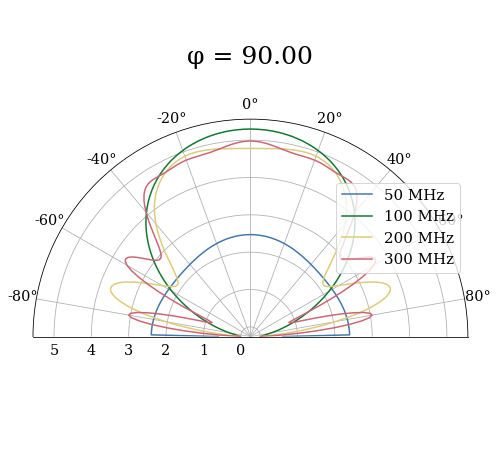

In [25]:
gain_plots(90,[50, 100, 200, 300], gain_array)

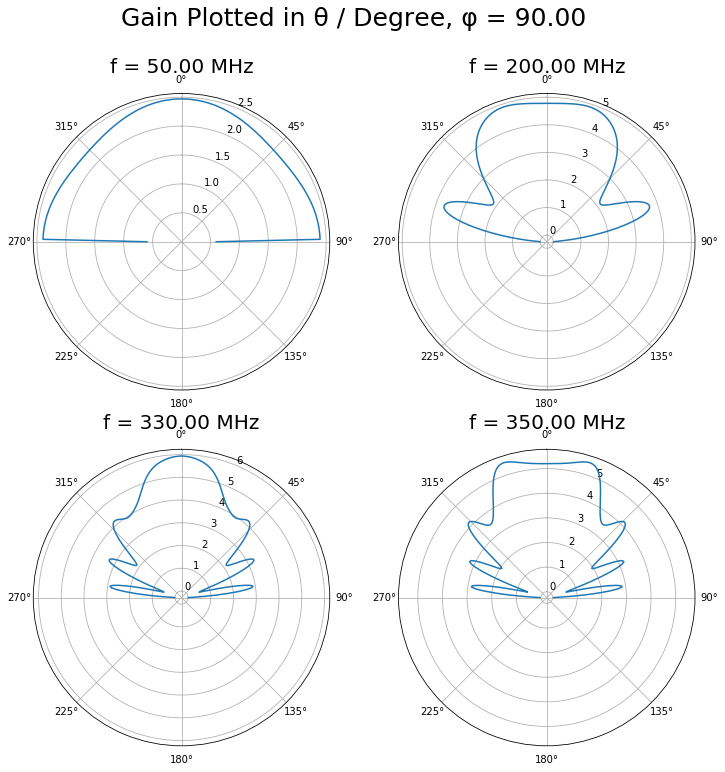

In [6]:
gain_plots(90,[50,200,330,350], gain_array)

In [12]:
def grad_gain_plots(az, freq, g_array):
    az_value = np.where(np.linspace(0, 359, 360)==az)[0][0]
    fig, axs = plt.subplots(2,2, subplot_kw={'projection': 'polar'}, figsize=(12,12))
    phi = np.linspace(-90, 90, 181)*I3Units.degree # zen actually
    i = 0
    for subl in [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]:
        freq_value = np.where(np.linspace(50, 350, 301)==freq[i])[0][0]
        subl.plot(phi, np.abs(gain_grad[1][az_value,:,freq_value]))
        subl.set_theta_direction(-1)
        subl.set_theta_offset(np.pi/2.0)
        subl.set_title('f = %0.2f MHz' %((np.linspace(50, 350, 301)))[freq_value], fontsize=20)
        i += 1
    fig.suptitle('Grad Gain wrt \u03C6, Plotted in \u03B8 / Degree, \u03C6 = %0.2f' %(az_value), fontsize=25) 
    plt.show()

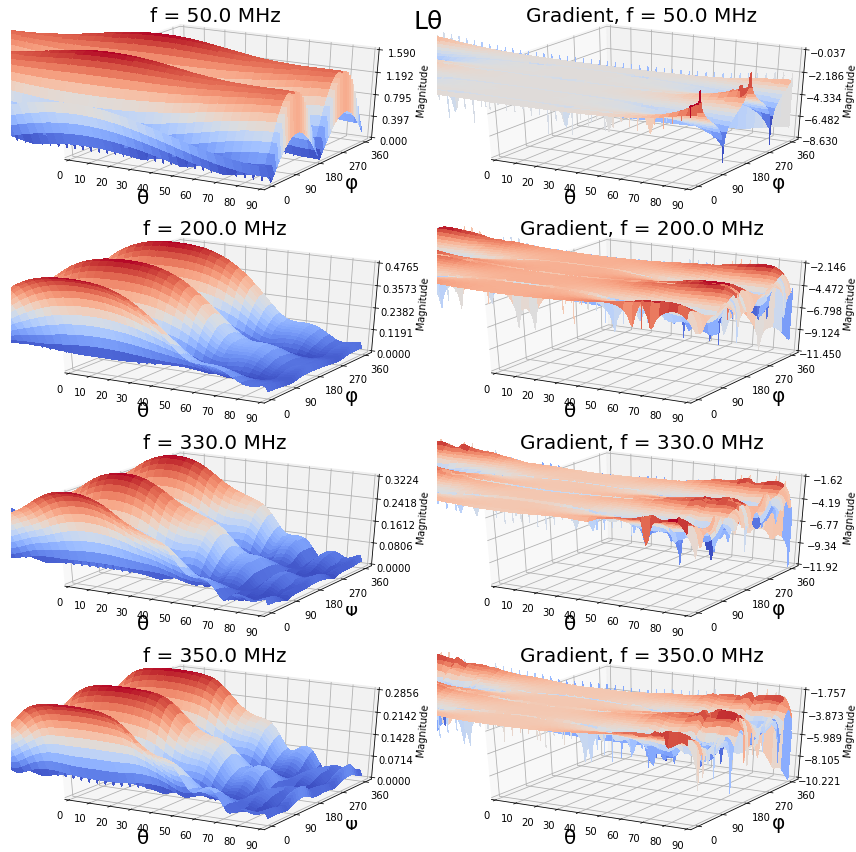

In [65]:
e_vector_plots(4, [50,200,330,350], [ex_grad, ey_grad], 'L\u03B8')

In [61]:
mat_sq = np.ma.array(((ex_grad[1][:,:,50]**2) + (ey_grad[1][:,:,50]**2))/(ex_array[:,:,50]**2 + ey_array[:,:,50]**2))
mat_sq_masked = np.abs(np.ma.masked_where(mat_sq==0, mat_sq))
g_squared = np.ma.array(np.log10(mat_sq_masked))

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


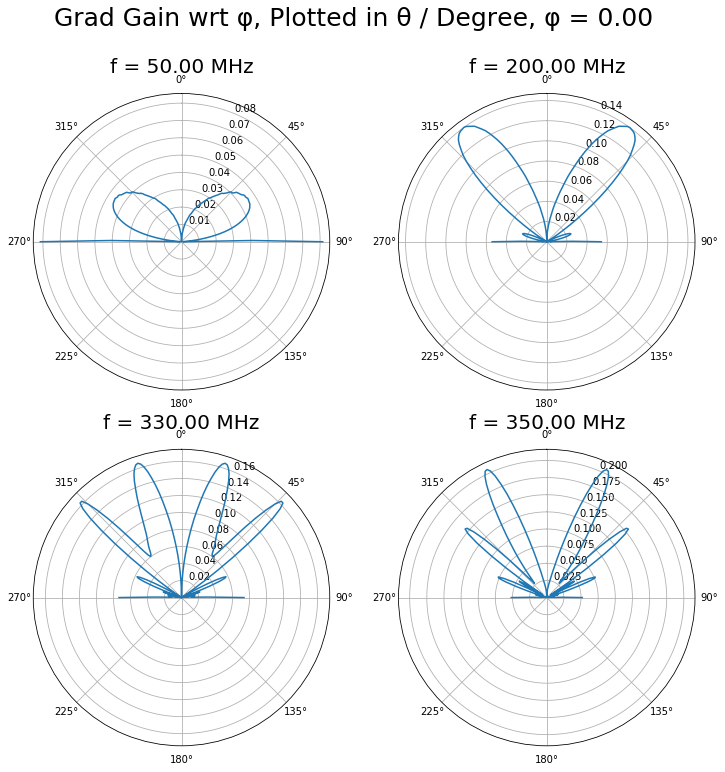

In [13]:
grad_gain_plots(0,[50,200,330,350], gain_array)

In [4]:
def e_grad_plots_azi(plot_no, freq, grad_array):
    fig, axs = plt.subplots(plot_no,2, subplot_kw={'projection': '3d'}, squeeze=False, figsize=(12,12))
    azi, zen = np.linspace(0, 359, 360), np.linspace(0, 90, 91)
    Z, A = np.meshgrid(zen, azi)
    grad_array_1, grad_array_2 = grad_array[0], grad_array[1]
    i = 0
    for i in range(0,plot_no):
        for m in range (0,2):
            subpl = axs[i,m]
            freq_value = np.where(np.linspace(50, 350, 301)==freq[i])[0][0]
            if m == 0:
                subpl.plot_surface(Z, A, grad_array_1[0][:,:,freq_value], cmap=cm.coolwarm, linewidth=0, antialiased=False)
                subpl.set_title('Gradient, f = %0.1f MHz' %(freq[i]), fontsize=20)
                subpl.set_zticks(np.linspace(np.min(grad_array_1[0][:,:,freq_value]), np.max(grad_array_1[0][:,:,freq_value]), 5))
            if m == 1:
                mat_sq = np.ma.array((grad_array_1[0][:,:,freq_value]**2) + (grad_array_2[0][:,:,freq_value]**2))/(ex_array[:,:,freq_value]**2 + ey_array[:,:,freq_value]**2)
                mat_sq_masked = np.ma.masked_where(mat_sq == 0, mat_sq)
                g_squared = np.log10(np.abs(mat_sq_masked))
                subpl.plot_surface(Z, A, g_squared, cmap=cm.coolwarm, linewidth=0, antialiased=False)
                subpl.set_title('Quadrature, f = %0.1f MHz' %(freq[i]), fontsize=20)
                subpl.set_zticks(np.linspace(np.min(g_squared), np.max(g_squared), 5))
                #subpl.set_zscale('log')
                #subpl.zaxis._set_scale('log')
            #subpl.zaxis.set_major_locator(LinearLocator(10))
            subpl.set_xlabel('\u03B8', fontsize=20)
            subpl.set_ylabel('\u03C6', fontsize=20)
            subpl.set_zlabel('Magnitude')
            subpl.set_yticks([0, 90.0, 180, 270, 360])
            subpl.set_xlim(0, 90)
            #subl.set_ylim(-1.01, 1.01)
    plt.tight_layout()      
    fig.suptitle('Ex, wrt \u03C6', fontsize=25)

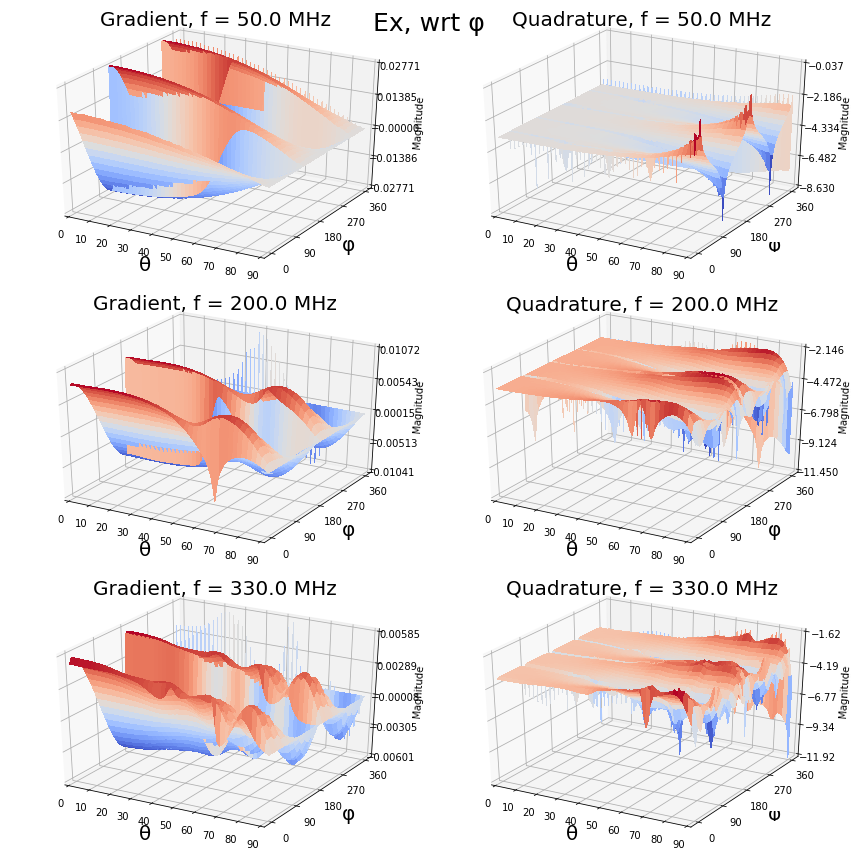

In [57]:
e_grad_plots_azi(3, [50,200,330], [ex_grad, ey_grad])

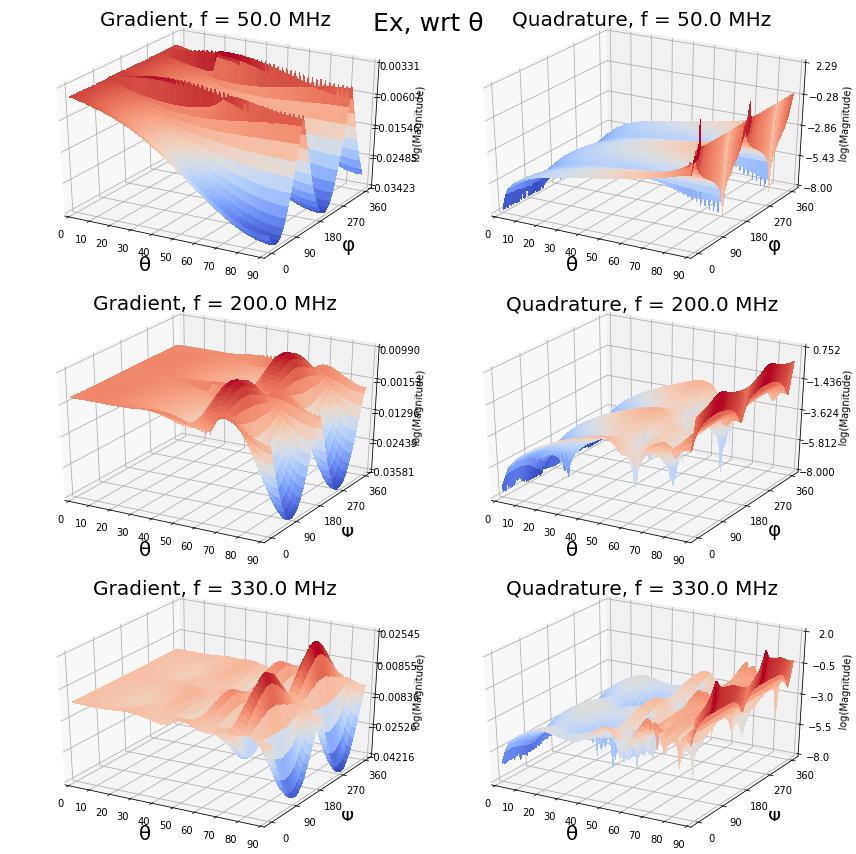

In [72]:
e_grad_plots_zen(3, [50,200,330], [ex_grad, ey_grad])

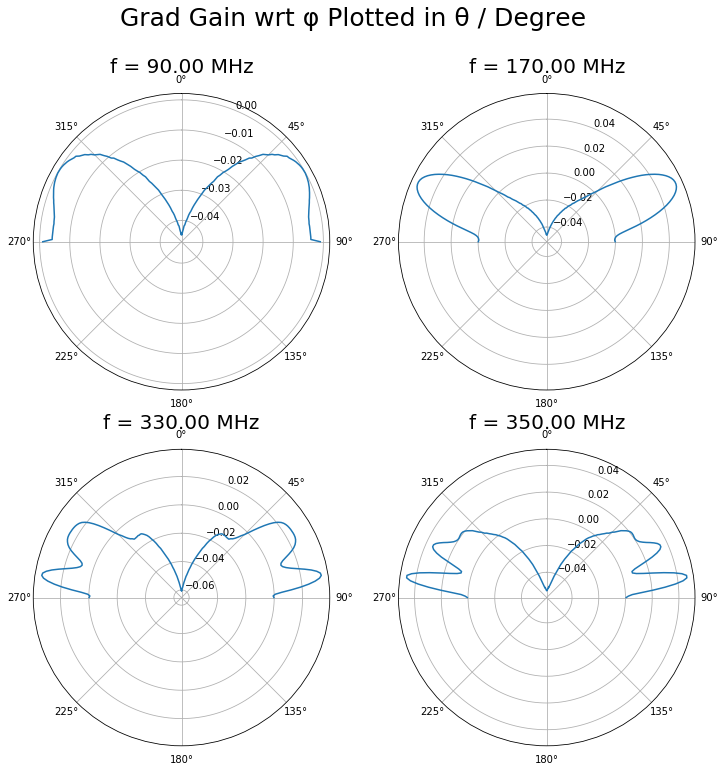

In [97]:
fig, axs = plt.subplots(2,2, subplot_kw={'projection': 'polar'}, figsize=(12,12))
#phi = np.linspace(0, 359, 360)
phi = np.linspace(-90, 90, 181)*I3Units.degree # zen actually
axs[0, 0].plot(phi, gain_grad[0][200,:,40])
axs[0,0].set_theta_direction(-1)
axs[0,0].set_theta_offset(np.pi/2.0)
axs[0, 0].set_title('f = %0.2f MHz' %((np.linspace(50, 350, 301)))[40], fontsize=20)
axs[0, 1].plot(phi, gain_grad[0][200,:,120])
axs[0, 1].set_theta_direction(-1)
axs[0, 1].set_theta_offset(np.pi/2.0)
axs[0, 1].set_title('f = %0.2f MHz' %((np.linspace(50, 350, 301)))[120], fontsize=20)
axs[1, 0].plot(phi, gain_grad[0][200,:,280])
axs[1, 0].set_theta_direction(-1)
axs[1, 0].set_theta_offset(np.pi/2.0)
axs[1, 0].set_title('f = %0.2f MHz' %((np.linspace(50, 350, 301)))[280], fontsize=20)
axs[1, 1].plot(phi, gain_grad[0][200,:,300])
axs[1, 1].set_theta_direction(-1)
axs[1, 1].set_theta_offset(np.pi/2.0)
axs[1, 1].set_title('f = %0.2f MHz' %((np.linspace(50, 350, 301)))[300], fontsize=20)
fig.suptitle('Grad Gain wrt \u03C6 Plotted in \u03B8 / Degree', fontsize=25) 
plt.show()

In [3]:
ex_grad = np.gradient(ex_array)
ey_grad = np.gradient(ey_array)

NameError: name 'surf' is not defined

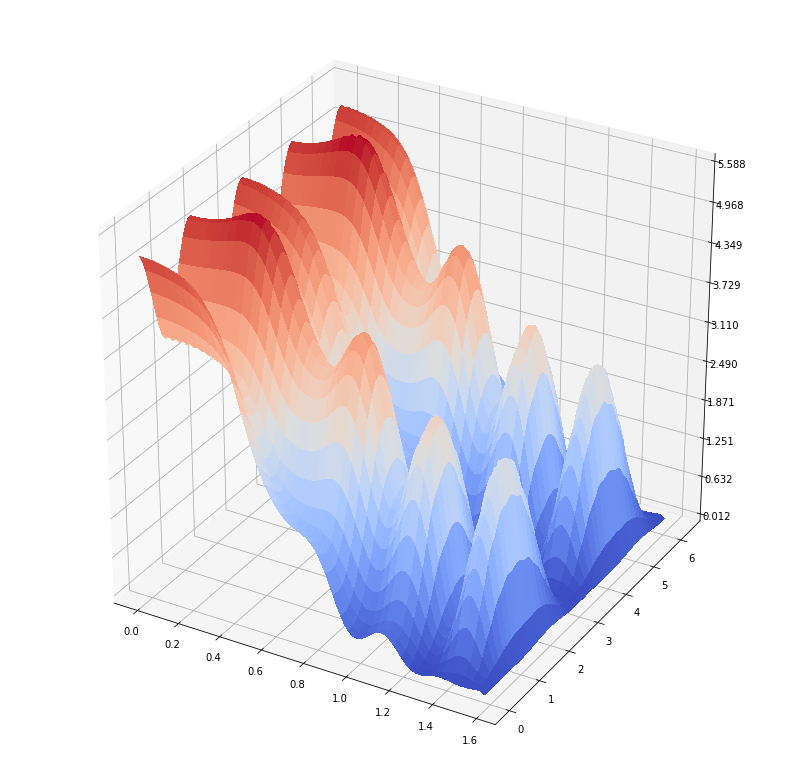

In [31]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111,projection='3d')

# Make data.
azi = np.linspace(0, 359, 360)* I3Units.degree
zen = np.linspace(0, 90, 91)* I3Units.degree
#f = np.linspace(50, 350, 301) * I3Units.megahertz
Z, A = np.meshgrid(zen, azi)
G = gain_array[:,:,300]


# Plot the surface.
#ax.plot_surface(Z, A, G, cmap=plt.cm.YlGnBu_r)
ax.plot_surface(Z, A, G, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111,projection='3d')

# Make data.
x_plot, y_plot = np.meshgrid(X, Y, sparse=True)

# Plot the surface.
#ax.plot_surface(Z, A, G, cmap=plt.cm.YlGnBu_r)
ax.plot_wireframe(x_plot, y_plot, z_plot, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [24]:
I3Units.degree

0.017453292519943295

In [30]:
I3Units.megahertz

0.001

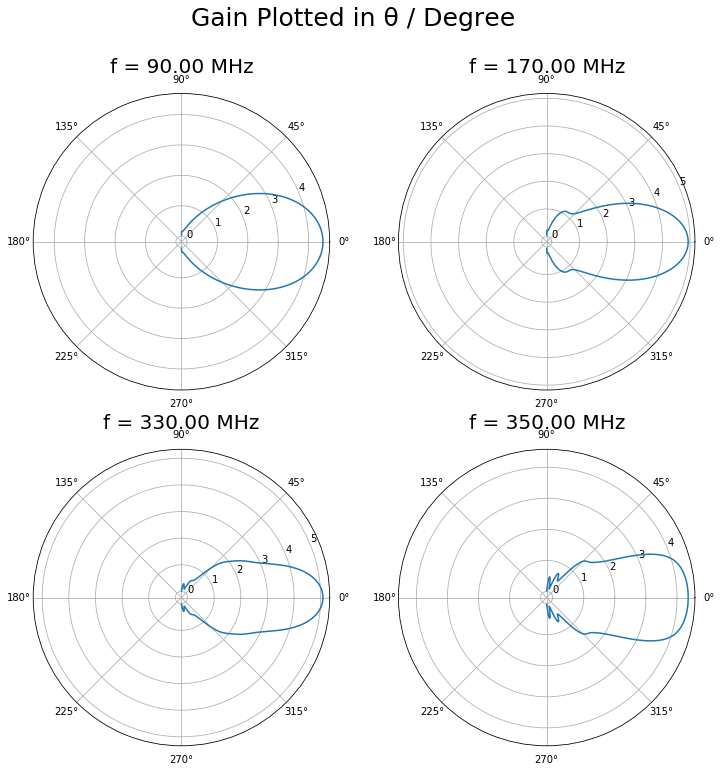

In [95]:
fig, axs = plt.subplots(2,2, subplot_kw={'projection': 'polar'}, figsize=(12,12))
#phi = np.linspace(0, 359, 360)
phi = np.linspace(-90, 90, 181)*I3Units.degree # zen actually
axs[0, 0].plot(phi, gain_array[200,:,40])
axs[0, 0].set_title('f = %0.2f MHz' %((np.linspace(50, 350, 301)))[40], fontsize=20)
axs[0, 1].plot(phi, gain_array[200,:,120])
axs[0, 1].set_title('f = %0.2f MHz' %((np.linspace(50, 350, 301)))[120], fontsize=20)
axs[1, 0].plot(phi, gain_array[200,:,280])
axs[1, 0].set_title('f = %0.2f MHz' %((np.linspace(50, 350, 301)))[280], fontsize=20)
axs[1, 1].plot(phi, gain_array[200,:,300])
axs[1, 1].set_title('f = %0.2f MHz' %((np.linspace(50, 350, 301)))[300], fontsize=20)
fig.suptitle('Gain Plotted in \u03B8 / Degree', fontsize=25) 
plt.show()

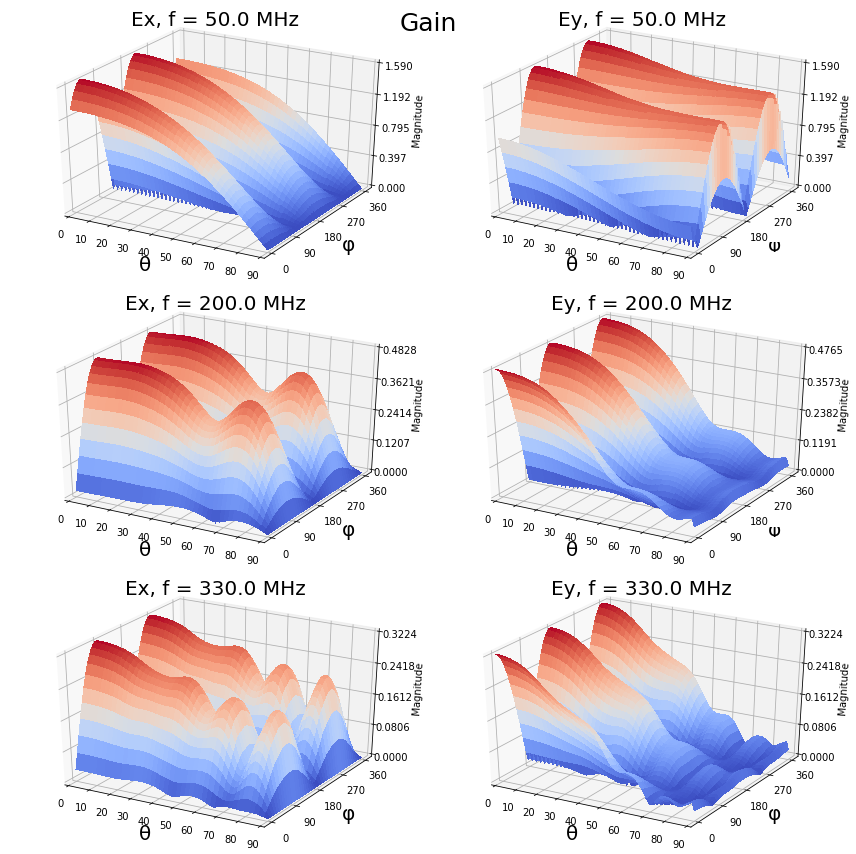

In [44]:
e_vector_plots(3, [50,200,330], [ex_array, ey_array], ['Ex', 'Ey'], 'Gain')

In [43]:
def e_vector_plots(plot_no, freq, e_array, e_components, title):
    #az_value = np.where(np.linspace(0, 359, 360)==az)[0][0]
    fig, axs = plt.subplots(plot_no,2, subplot_kw={'projection': '3d'}, squeeze=False, figsize=(12,12))
    azi, zen = np.linspace(0, 359, 360), np.linspace(0, 90, 91)
    #f = np.linspace(50, 350, 301) * I3Units.megahertz
    Z, A = np.meshgrid(zen, azi)
    e_array_1, e_array_2 = e_array[0], e_array[1]
    e_title_1, e_title_2 = e_components[0], e_components[1]
    i = 0
    for i in range(0,plot_no):
        for m in range (0,2):
            subpl = axs[i,m]
            freq_value = np.where(np.linspace(50, 350, 301)==freq[i])[0][0]
            if m == 0:
                subpl.plot_surface(Z, A, e_array_1[:,:,freq_value], cmap=cm.coolwarm, linewidth=0, antialiased=False)
                subpl.set_title(e_title_1+', f = %0.1f MHz' %(freq[i]), fontsize=20)
                subpl.set_zticks(np.linspace(0, np.max(e_array_1[:,:,freq_value]), 5))
            if m == 1:
                subpl.plot_surface(Z, A, e_array_2[:,:,freq_value], cmap=cm.coolwarm, linewidth=0, antialiased=False)
                subpl.set_title(e_title_2+', f = %0.1f MHz'%(freq[i]), fontsize=20)
                subpl.set_zticks(np.linspace(0, np.max(e_array_2[:,:,freq_value]), 5))
            subpl.set_xlabel('\u03B8', fontsize=20)
            subpl.set_ylabel('\u03C6', fontsize=20)
            subpl.set_zlabel(' Magnitude')
            subpl.set_yticks([0, 90.0, 180, 270, 360])
            subpl.set_xlim(0, 90)
            #subl.set_ylim(-1.01, 1.01)
    plt.tight_layout()      
    fig.suptitle(title, fontsize=25)

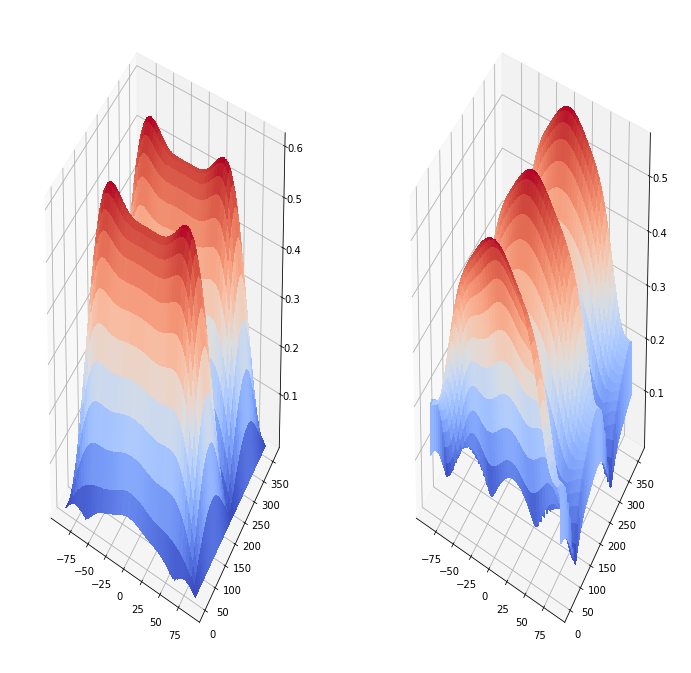

In [12]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D  

#fig = plt.figure(figsize=(14, 14))
fig, axs = plt.subplots(1,2, subplot_kw={'projection': '3d'}, figsize=(12,12))
#fig, axs = plt.subplots(1,1, projection='3d', figsize=(12,12))
#ax_ex = fig.add_subplot(111,projection='3d')
#ax_ey = fig.add_subplot(222,projection='3d')

# Make data.
#I3Units.degree
azi = np.linspace(0, 359, 360)
zen = np.linspace(-90, 90, 181)
#f = np.linspace(50, 350, 301) * I3Units.megahertz
Z, A = np.meshgrid(zen, azi)
G_ex = ex_array[:,:,90]
G_ey = ey_array[:,:,90]

#Z, A = np.cos(Z_rad), np.sin(A_rad)

# Plot the surface.
#ax.plot_surface(Z, A, G, cmap=plt.cm.YlGnBu_r)
#subl.plot(phi, g_array[az,:,freq_value])
#surf_ex = ax_ex.plot_surface(Z, A, G_ex, cmap=cm.coolwarm, linewidth=0, antialiased=False)
surf_ex = axs[0].plot_surface(Z, A, G_ex, cmap=cm.coolwarm, linewidth=0, antialiased=False)
surf_ey = axs[1].plot_surface(Z, A, G_ey, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax_ex.set_title('Ex at 90 MHz', fontsize=30)
#ax_ex.set_xlabel('\u03B8', fontsize=20)
#ax_ex.set_ylabel('\u03C6', fontsize=20)

#ax_ey.set_title('Ey at 90 MHz', fontsize=30)
#ax_ey.set_xlabel('\u03B8', fontsize=20)
#ax_ey.set_ylabel('\u03C6', fontsize=20)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax_ex.zaxis.set_major_locator(LinearLocator(10))
#ax_ey.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#ax_ex.colorbar(surf_ex, shrink=0.5, aspect=5, label='Magnitude of Ex')

plt.show()

In [3]:
gain_grad = np.gradient(gain_array)
#gain_grad